In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

# read data and index by Date
data = pd.read_csv('avocado.csv', parse_dates=['Date'], index_col='Date')

# copy dataframe by region
region_data = data[data['region'] == 'TotalUS'].copy()
# convert index to datetime
region_data.index = pd.to_datetime(region_data.index)

region_data.sort_index(inplace=True)
region_data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
2015-01-04,51,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
2015-01-11,50,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS
2015-01-11,50,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,TotalUS
2015-01-18,49,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS


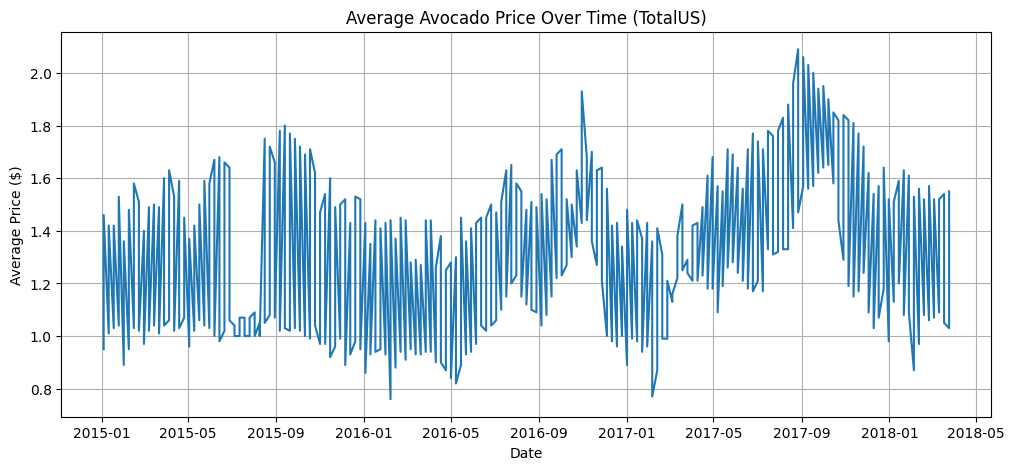

In [3]:

plt.figure(figsize=(12, 5))
plt.plot(region_data.index, region_data['AveragePrice'])
plt.title("Average Avocado Price Over Time (TotalUS)")
plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()



Essayons de lisser en harmonisans de 30 jours pour observer

In [ ]:
#visualisation MA30 avec plotly express
region_data['MA30'] = region_data['AveragePrice'].rolling(window=30).mean()

fig = px.line(region_data, x=region_data.index, y=['AveragePrice', 'MA30'],
              title='Average Avocado Price with 30-Day Moving Average (TotalUS)',
                labels={'value': 'Average Price ($)', 'Date': 'Date'})
fig.show()
